### load data

In [52]:
import pandas as pd
samples = pd.read_csv('..\\datasets\\Grains\\seeds.csv', delimiter=',')
#seeds.csv already hold the label of each grain as last colums
# let's drop it so that the model try to guess it
varieties = samples[samples.columns[-1]].values
samples = samples.drop(samples.columns[-1],axis=1)
varieties.reshape(-1,1)

print(samples.shape)

(209, 7)


In [ ]:
### Hierarchical clustering of the grain data

     15.26  14.84   0.871  5.763  3.312  2.221   5.22
0    14.88  14.57  0.8811  5.554  3.333  1.018  4.956
1    14.29  14.09  0.9050  5.291  3.337  2.699  4.825
2    13.84  13.94  0.8955  5.324  3.379  2.259  4.805
3    16.14  14.99  0.9034  5.658  3.562  1.355  5.175
4    14.38  14.21  0.8951  5.386  3.312  2.462  4.956
..     ...    ...     ...    ...    ...    ...    ...
204  12.19  13.20  0.8783  5.137  2.981  3.631  4.870
205  11.23  12.88  0.8511  5.140  2.795  4.325  5.003
206  13.20  13.66  0.8883  5.236  3.232  8.315  5.056
207  11.84  13.21  0.8521  5.175  2.836  3.598  5.044
208  12.30  13.34  0.8684  5.243  2.974  5.637  5.063

[209 rows x 7 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3

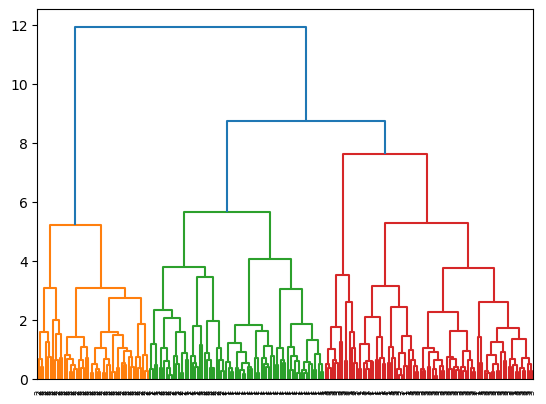

In [53]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

print(samples)
print(varieties)
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

### Hierarchies of stocks

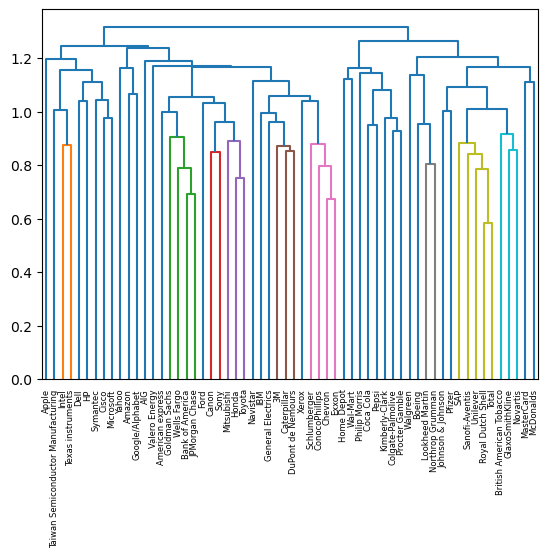

In [28]:
movements = pd.read_csv('..\\datasets\\company-stock-movements-2010-2015-incl.csv', delimiter=',') # , skiprows=1
#the csv already hold the label of each fish as last colums
# let's drop it so that the model try to guess it
companies = movements[movements.columns[0]].values
movements = movements.drop(movements.columns[0],axis=1).values
#print(movements)

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6
)
plt.show()
# THis would reveal what companies stocks move together

###  Different linkage, different hierarchical clustering!

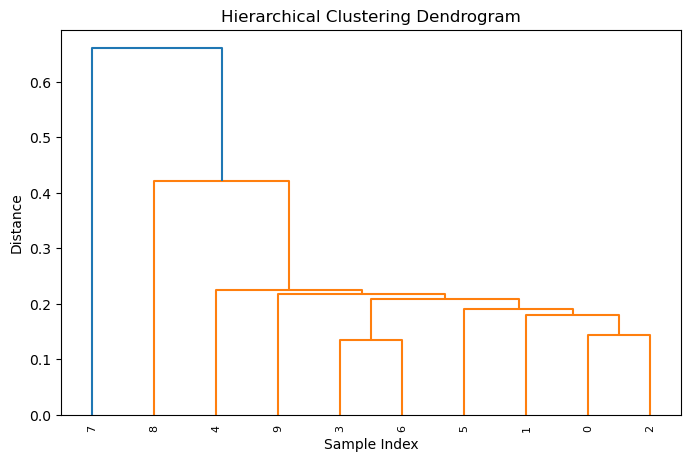

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate some random data
np.random.seed(0)
X = np.random.rand(10, 2)  # 10 points in 2 dimensions

# Perform hierarchical clustering
Z = linkage(X, method='single')  # You can choose different linkage methods like ward, single, complete, average, etc.

# Plot the dendrogram
plt.figure(figsize=(8, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()


### Extracting the cluster labels

In [58]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 4 2 2 4 2 2 2 2 2 2 2
 2 3 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 2 2 2 4 2 2 2 1 2
 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 4 3 3 4 4 3 4 4 4
 4 4 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4 4 3 4
 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4]
varieties   1   2   3
labels               
1           0  47   0
2          51  23   0
3           1   0  13
4          17   0  57


### t-SNE visualization of grain dataset

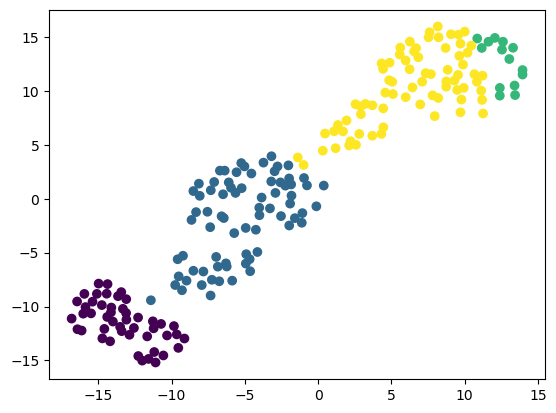

In [60]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by labels
plt.scatter(xs, ys, c=labels)
plt.show()


 ###  A t-SNE map of the stock market

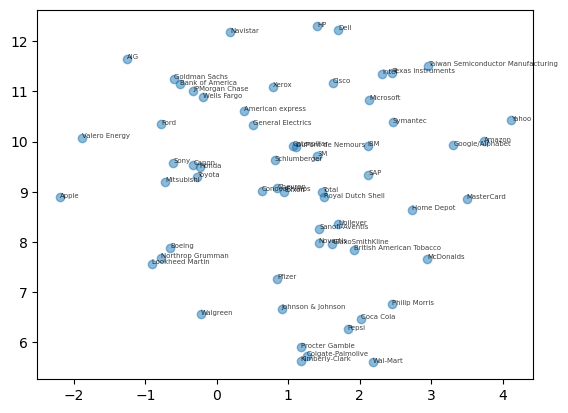

In [61]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
